# 3. Community Detection

In [15]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import networkx as nx

# load
df_ending = pd.read_csv('../data/aot_ending.csv')
df_ending['created_utc'] = pd.to_datetime(df_ending['created_utc'])
df_comments = pd.read_csv('../data/comments_graph_ending_final.csv')
df_comments['created_utc'] = pd.to_datetime(df_comments['created_utc'])
G = pickle.load(open('../data/comments_graph.pickle', 'rb'))

In [16]:
def community_detection(G, c):
    """
    Community detection utility function
    """
    # number of communities
    print("Number of communities: ", len(c), end="\n\n")

    # size of communities
    community_sizes = [len(community) for community in c]
    for i, size in enumerate(community_sizes, 1):
        print(f"Community {i:>2}: Size {size}")

    # modularity
    print(f"\nModularity: {nx.community.modularity(G, c):.4f}")

    ######
    # create a DataFrame node-community
    l=[]
    i=0

    for community in c:
        for node in community:
            l.append([node,i])
        i+=1

    # create DataFrame
    # IMPORTANT: the order of nodes in the DataFrame is the same as in G.nodes()
    # so we match the communities to the nodes in the graph, for example for the color in the plot
    df = pd.DataFrame(l, columns=['node', 'community'])
    df = df.set_index('node').reindex(G.nodes()).reset_index()

    return df


In [17]:
pos = nx.spring_layout(G, iterations=50, seed=1721)

## Community detection


### 1. Greedy modularity

In [26]:
c_greedy = nx.community.greedy_modularity_communities(G)
df_greedy = community_detection(G, c_greedy)

Number of communities:  157

Community  1: Size 3333
Community  2: Size 1103
Community  3: Size 831
Community  4: Size 827
Community  5: Size 728
Community  6: Size 441
Community  7: Size 295
Community  8: Size 264
Community  9: Size 242
Community 10: Size 193
Community 11: Size 164
Community 12: Size 113
Community 13: Size 112
Community 14: Size 109
Community 15: Size 105
Community 16: Size 89
Community 17: Size 82
Community 18: Size 57
Community 19: Size 49
Community 20: Size 43
Community 21: Size 37
Community 22: Size 19
Community 23: Size 18
Community 24: Size 17
Community 25: Size 15
Community 26: Size 15
Community 27: Size 13
Community 28: Size 13
Community 29: Size 13
Community 30: Size 12
Community 31: Size 12
Community 32: Size 12
Community 33: Size 10
Community 34: Size 9
Community 35: Size 9
Community 36: Size 8
Community 37: Size 7
Community 38: Size 7
Community 39: Size 6
Community 40: Size 6
Community 41: Size 5
Community 42: Size 5
Community 43: Size 5
Community 44: Size

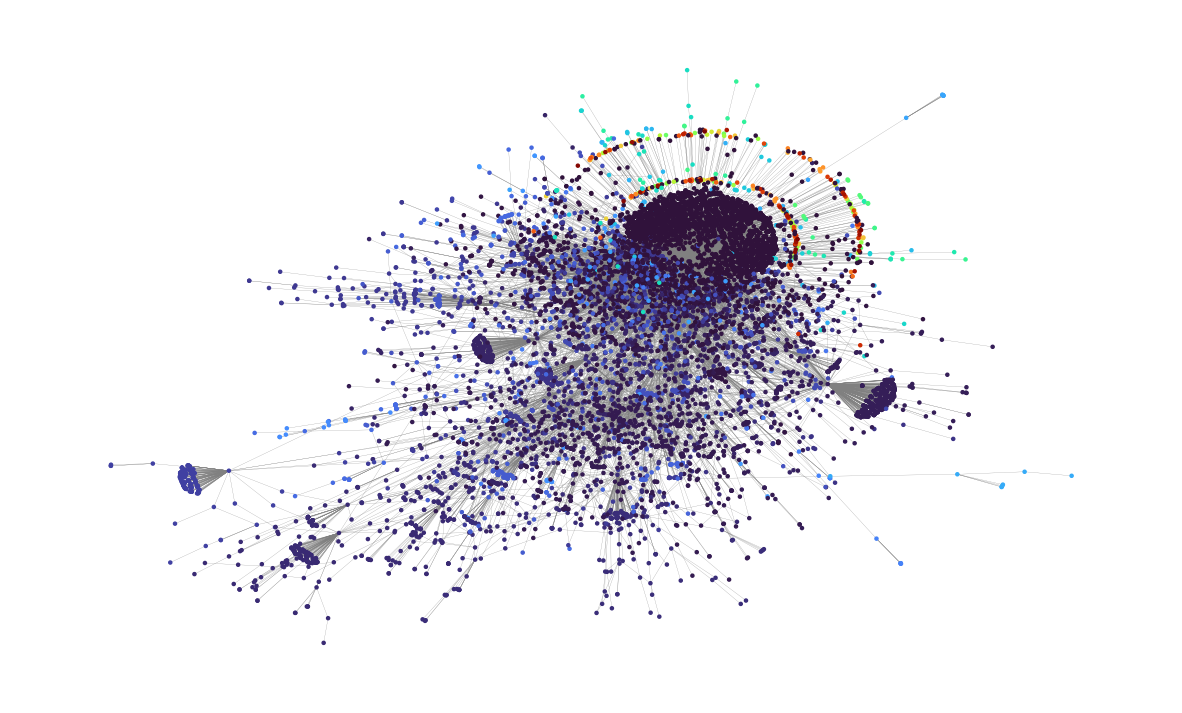

In [19]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, node_color=df_greedy['community'], cmap=plt.cm.turbo, edge_color='gray', node_size=5, with_labels=False, width=0.15)

### 2. Louvain

In [27]:
c_louvain = nx.community.louvain_communities(G)
df_louvain = community_detection(G, c_louvain)

Number of communities:  57

Community  1: Size 26
Community  2: Size 339
Community  3: Size 254
Community  4: Size 154
Community  5: Size 244
Community  6: Size 105
Community  7: Size 214
Community  8: Size 296
Community  9: Size 356
Community 10: Size 59
Community 11: Size 629
Community 12: Size 113
Community 13: Size 3
Community 14: Size 84
Community 15: Size 157
Community 16: Size 208
Community 17: Size 3
Community 18: Size 175
Community 19: Size 3
Community 20: Size 4
Community 21: Size 3
Community 22: Size 30
Community 23: Size 159
Community 24: Size 3
Community 25: Size 5
Community 26: Size 217
Community 27: Size 3
Community 28: Size 3
Community 29: Size 203
Community 30: Size 445
Community 31: Size 294
Community 32: Size 283
Community 33: Size 9
Community 34: Size 4
Community 35: Size 73
Community 36: Size 85
Community 37: Size 40
Community 38: Size 164
Community 39: Size 3
Community 40: Size 7
Community 41: Size 3
Community 42: Size 4
Community 43: Size 74
Community 44: Size 29

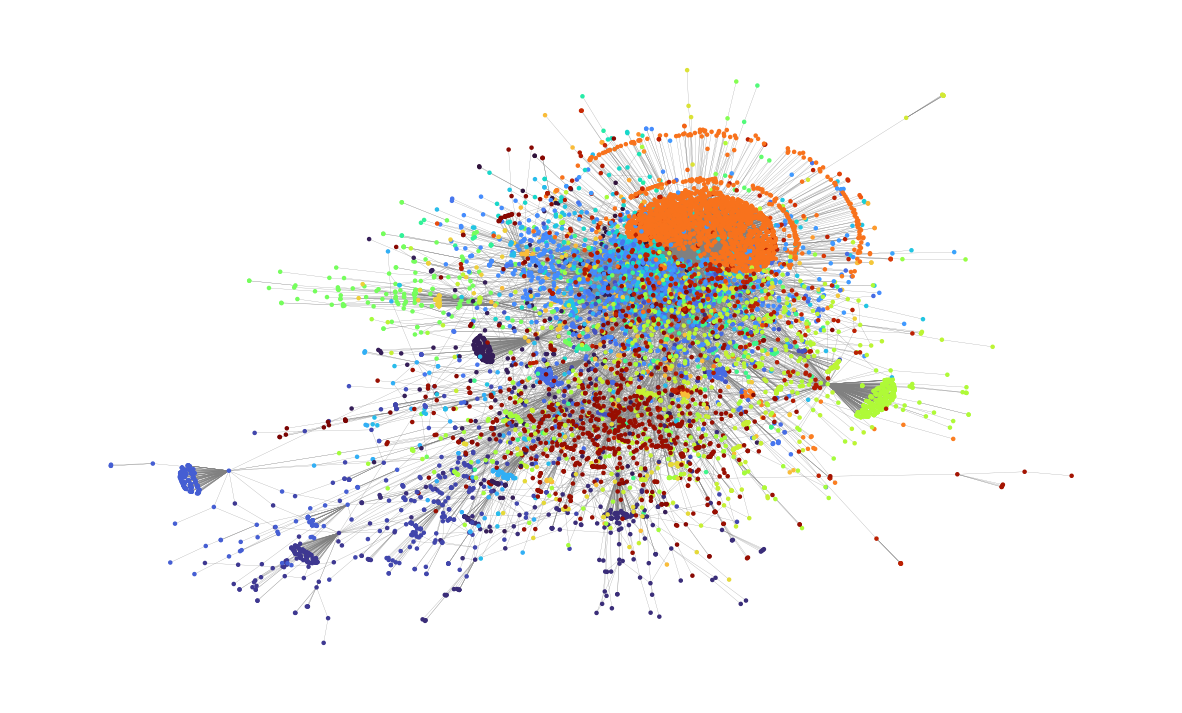

In [35]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, node_color=df_louvain['community'], cmap=plt.cm.turbo, edge_color='gray', node_size=5, with_labels=False, width=0.15)

### 3. FluidC

In [30]:
k_to_modularity = {}
for k in range(1, 26):
    c = list(nx.community.asyn_fluidc(G, k))
    modularity = nx.community.modularity(G, c)
    k_to_modularity[k] = modularity
    print(f"#communities = {k}, Modularity = {modularity:.4f}")

#communities = 1, Modularity = 0.0000
#communities = 2, Modularity = 0.3705
#communities = 3, Modularity = 0.5237
#communities = 4, Modularity = 0.5632
#communities = 5, Modularity = 0.5688
#communities = 6, Modularity = 0.5011
#communities = 7, Modularity = 0.5808
#communities = 8, Modularity = 0.5485
#communities = 9, Modularity = 0.4952
#communities = 10, Modularity = 0.5297
#communities = 11, Modularity = 0.5318
#communities = 12, Modularity = 0.4942
#communities = 13, Modularity = 0.4966
#communities = 14, Modularity = 0.6537
#communities = 15, Modularity = 0.5037
#communities = 16, Modularity = 0.5205
#communities = 17, Modularity = 0.5119
#communities = 18, Modularity = 0.5392
#communities = 19, Modularity = 0.5396
#communities = 20, Modularity = 0.4816
#communities = 21, Modularity = 0.5111
#communities = 22, Modularity = 0.5111
#communities = 23, Modularity = 0.5208
#communities = 24, Modularity = 0.5100
#communities = 25, Modularity = 0.5098


In [31]:
# the best k is the one with the highest modularity
top_k = max(k_to_modularity, key=k_to_modularity.get)
c_fluidc = list(nx.community.asyn_fluidc(G, k=top_k))
df_fluidc = community_detection(G, c_fluidc)

Number of communities:  14

Community  1: Size 536
Community  2: Size 627
Community  3: Size 577
Community  4: Size 795
Community  5: Size 1248
Community  6: Size 616
Community  7: Size 532
Community  8: Size 373
Community  9: Size 534
Community 10: Size 1165
Community 11: Size 403
Community 12: Size 551
Community 13: Size 1136
Community 14: Size 626

Modularity: 0.5466


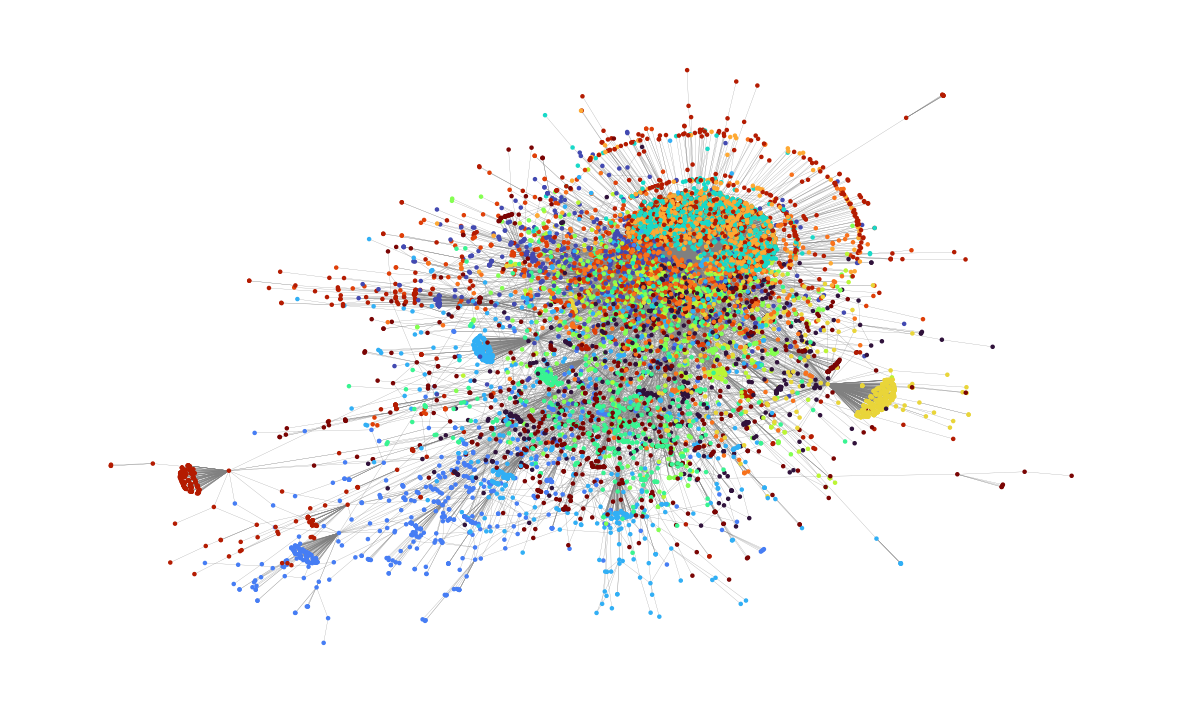

In [34]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, node_color=df_fluidc['community'], cmap=plt.cm.turbo, edge_color='gray', node_size=5, with_labels=False, width=0.15)

We tried also Fluidc for showing that it is not suited when we have a big difference in size between divisive subgroups. This is given from his nature as an algorithm, since to each community is given a limited amount of resources.

Store in a dataframe all the communities

In [40]:
df_fluidc.rename(columns={'community': 'fluidc_community'}, inplace=True)
df_louvain.rename(columns={'community': 'louvain_community'}, inplace=True)
df_greedy.rename(columns={'community': 'greedy_community'}, inplace=True)
# merge the DataFrames
df_communities = df_fluidc.merge(df_louvain, on='node').merge(df_greedy, on='node')
# save the DataFrame
df_communities.to_csv('../data/communities.csv', index=False)
df_communities.head()

,node,fluidc_community,louvain_community,greedy_community
0,joaopaulofoo,12,25,8
1,Umer123321,12,25,8
2,ashai1994,12,25,8
3,Jdep11,1,25,8
4,LordNelson27,1,25,8


## Infomap

In [36]:
# Create node mapping from string to integer
node_to_id = {node: i for i, node in enumerate(G.nodes())}

from infomap import Infomap
im = Infomap()
# Add nodes and edges to Infomap
for node in G.nodes():
    im.add_node(node_to_id[node])

for u, v in G.edges():
    im.add_link(node_to_id[u], node_to_id[v])

im.run()

# Create reverse mapping for partition
id_to_node = {i: node for node, i in node_to_id.items()}
partition = {id_to_node[node.node_id]: node.module_id for node in im.iterLeafNodes()}


  Infomap v2.8.0 starts at 2025-06-05 14:13:58
  -> Input network: 
  -> No file output!
  OpenMP 201511 detected with 16 threads...
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 9719 nodes and 13848 links...
  -> One-level codelength: 10.8788249

Trial 1/1 starting at 2025-06-05 14:13:58
Two-level compression: 34% 0.25% 0.00837064766% 0.00691238525% 
Partitioned to codelength 2.33782604 + 4.78591039 = 7.12373643 in 686 modules.
Super-level compression: 1.97318397% to codelength 6.983172004 in 15 top modules.

Recursive sub-structure compression: 25.7175186% 0.354764092% 0% . Found 4 levels with codelength 6.927424957

=> Trial 1/1 finished in 0.13404352s with codelength 6.92742496


Summary after 1 trial
Best end modular solution in 4 levels:
Per level number of modules:         [         

In [37]:
# Convert partition dictionary to communities list format for community_detection function
communities = []
partition_values = set(partition.values())

for community_id in sorted(partition_values):
    community_nodes = [node for node, comm_id in partition.items() if comm_id == community_id]
    communities.append(community_nodes)

df_infomap = community_detection(G, communities)

Number of communities:  15

Community  1: Size 6357
Community  2: Size 843
Community  3: Size 726
Community  4: Size 377
Community  5: Size 260
Community  6: Size 218
Community  7: Size 175
Community  8: Size 191
Community  9: Size 146
Community 10: Size 145
Community 11: Size 85
Community 12: Size 79
Community 13: Size 75
Community 14: Size 28
Community 15: Size 14

Modularity: 0.4936


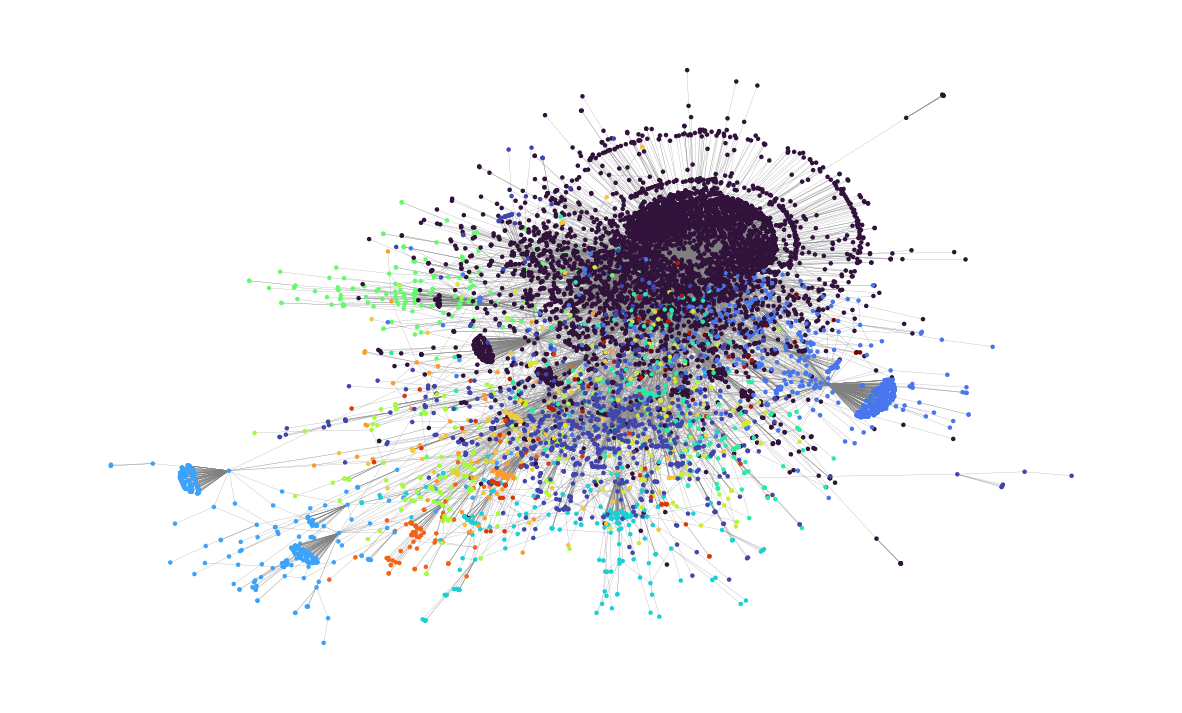

In [38]:
node_color = [partition[node] for node in G.nodes()]

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, node_color=node_color, cmap=plt.cm.turbo, edge_color='gray', node_size=5, with_labels=False, width=0.15)